In [2]:
# Importando o DataFrame
import pandas as pd

data_path = "../chalearn_dataset"

data_training = pd.read_csv(f"{data_path}/train/extraversion_data.csv")
df_training = pd.DataFrame.from_dict(data_training)

df_training.head(2000)

,Unnamed: 0,extraversion
0,zEyRyTnIw5I.005.mp4,0
1,nskJh7v6v1U.004.mp4,0
2,eHcRre1YsNA.000.mp4,0
3,VuadgOz6T7s.000.mp4,0
4,7nhJXn9PI0I.001.mp4,0
...,...,...
1995,9yZEb6bdxNY.004.mp4,1
1996,dNXqs5HNijI.004.mp4,1
1997,rG8D-A2F8xg.004.mp4,1
1998,F-Dy1EFm_Mw.005.mp4,1


## Trabalhando com Vídeo

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
# Extrai um número fixo de frames igualmente espaçados de um vídeo
def extract_video_frames(video_name, data_path, n=10, dim=(224, 224)):  
    video_path = data_path + video_name
    cap = cv2.VideoCapture(video_path)
    frames = []
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    jump_size = int(length // number_of_frames)
    for _ in range(number_of_frames):
        ret, frame = cap.read()
        frames.append(cv2.cvtColor(cv2.resize(frame, dim), cv2.COLOR_BGR2RGB))
        for __ in range(jump_size - 1):
          cap.grab()
    return np.array(frames)

Número de frames: 10
Formato dos frames: (224, 224, 3)
Frames extraídos:


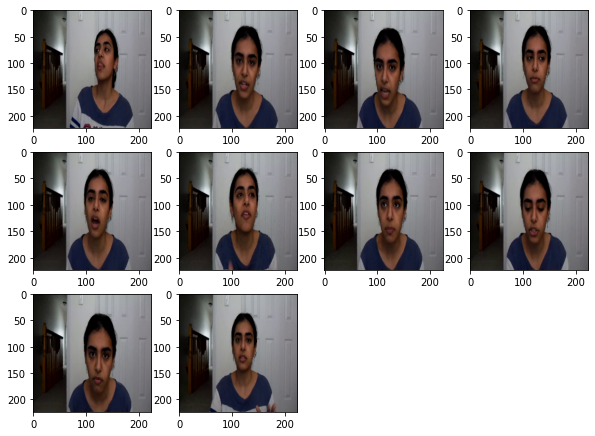

In [11]:
# Testando a função extract_video_frames e analisando a sua saída
video_name = "oANKg9_grdA.004.mp4"
video_data_path = f"{data_path}/train/"
number_of_frames=10

frames = extract_video_frames(video_name, video_data_path, number_of_frames)
print(f"Número de frames: {frames.shape[0]}\nFormato dos frames: {frames.shape[1:]}")

# Plotando o resultado:
print("Frames extraídos:")
fig = plt.figure(figsize=(10, 10))
rows = 4
columns = 4
for _ in range(number_of_frames):
    fig.add_subplot(rows, columns, _ + 1)
    plt.imshow(frames[_])

### Criando um objeto do tipo Layer que receberá o nome de uma imagem e retornará os frames extraídos

Deve ser conectado após a layer de input

In [15]:
#Importações necessárias para o funcionamento da Classe
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Extrator de Frames
class FramesExtractor(layers.Layer):
    '''
    data_path = caminho do diretório no qual os vídeos estão inseridos
    number_of_frames = número de frames a ser extraído a cada iteração
    dim = dimensões da imagem no formato (altura, largura)
    '''
    def __init__(self, data_path, number_of_frames=10, dim=(224, 224)):
        super(FramesExtractor, self).__init__()
        self.data_path = data_path
        self.number_of_frames = number_of_frames
        self.dim= dim
        

    def call(self, video_name):
        video_path = self.data_path + video_name
        cap = cv2.VideoCapture(video_path)
        frames = []
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        jump_size = int(length // self.number_of_frames)
        for _ in range(self.number_of_frames):
            ret, frame = cap.read()
            frames.append(cv2.cvtColor(cv2.resize(frame, self.dim), cv2.COLOR_BGR2RGB))
            for __ in range(jump_size - 1):
              cap.grab()
        return np.array(frames)
    
    def show(self, video_name):
        frames = self.call(video_name)
        print(f"Número de frames: {frames.shape[0]}\nFormato dos frames: {frames.shape[1:]}")

        # Plotando o resultado:
        print("Frames extraídos:")
        fig = plt.figure(figsize=(10, 10))
        rows = 4
        columns = 4
        for _ in range(self.number_of_frames):
            fig.add_subplot(rows, columns, _ + 1)
            plt.imshow(frames[_])

In [26]:
# Testando a classe acima
# Exemplo para alguém classificado como extrovertido
video_name = "rG8D-A2F8xg.004.mp4"
video_data_path = f"{data_path}/train/"
number_of_frames=16

frames_extractor = FramesExtractor(video_data_path, number_of_frames)

Número de frames: 16
Formato dos frames: (224, 224, 3)
Frames extraídos:


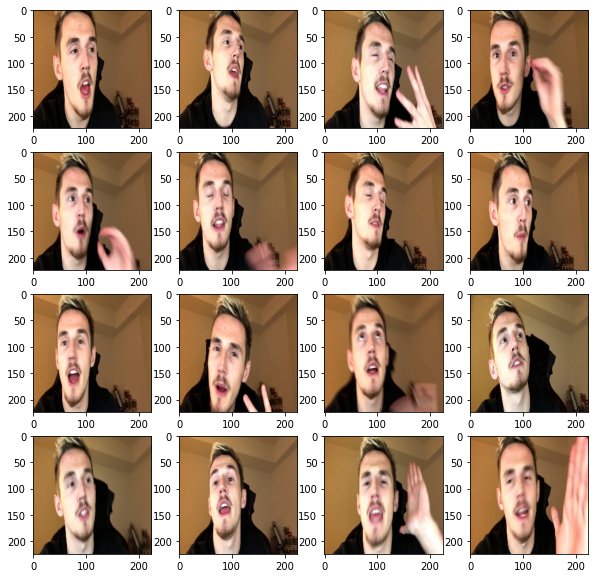

In [27]:
frames_extractor.show(video_name)

Número de frames: 16
Formato dos frames: (224, 224, 3)
Frames extraídos:


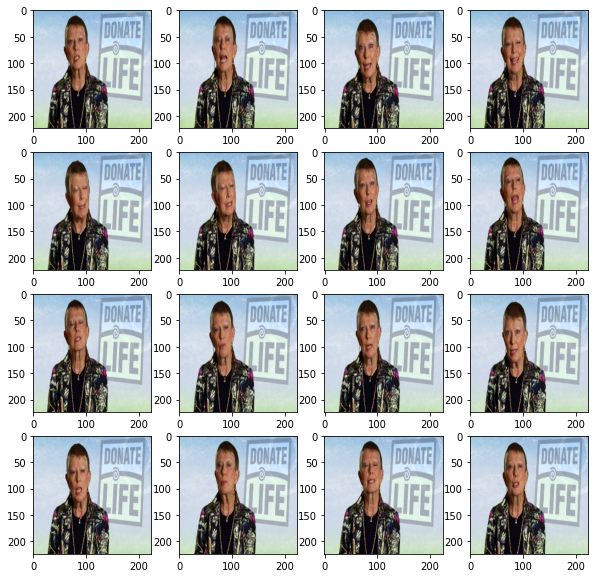

In [25]:
# Exemplo para alguém classificado como introvertido
video_name = "zEyRyTnIw5I.005.mp4"
frames_extractor.show(video_name)